# 20220404


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
df = pd.read_excel("Japan_Data.xlsx")
df1 = pd.read_excel("US_Treasury_Ownership.xlsx")


In [3]:
df = df.drop(df.index[range(0, 7)])
df = df.astype("float64")
df["Year"] = df["Series"].astype("int")
df = df.drop(["Series"], axis=1)


In [4]:
df.head()


,GDP,Priv. Consumption,Gov. Consumption,Priv. Inverstment,Gov. Investment,Inventory,Net Exports,GDP Deflator,Compensation of Employee,Wage and Salaries,...,Gross Debt,Unnamed: 43,Dweling,Other Building and Structure,Machinery and Equipment,Intellectual Property Equipments,Produced Fixed Assets (Non-Financial),Non-Produced Assets (Non-Financial),Financial Assets,Year
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954


## Non-Financial Asset of Household

- Source
- Cabinet Office "National Accounts of Japant"


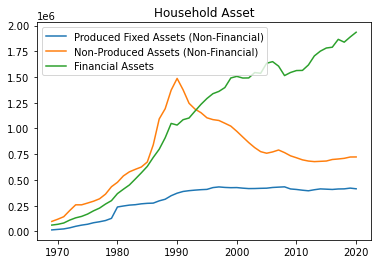

In [5]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Produced Fixed Assets (Non-Financial)"]
ax.plot(x, y, label="Produced Fixed Assets (Non-Financial)")

y = df["Non-Produced Assets (Non-Financial)"]
ax.plot(x, y, label="Non-Produced Assets (Non-Financial)")

y = df["Financial Assets"]
ax.plot(x, y, label="Financial Assets")

ax.set_title("Household Asset")
ax.legend()
plt.show()


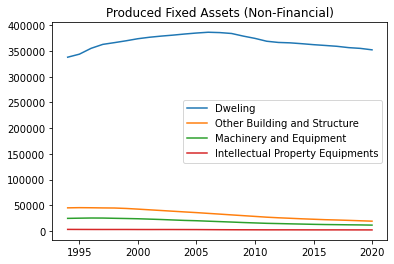

In [6]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Dweling"]
ax.plot(x, y, label="Dweling")

y = df["Other Building and Structure"]
ax.plot(x, y, label="Other Building and Structure")

y = df["Machinery and Equipment"]
ax.plot(x, y, label="Machinery and Equipment")

y = df["Intellectual Property Equipments"]
ax.plot(x, y, label="Intellectual Property Equipments")

ax.set_title("Produced Fixed Assets (Non-Financial)")
ax.legend()
plt.show()


In [7]:
df1["DATE"] = pd.to_datetime(df1["DATE"])


## US Treasury Ownership

- Source: Treasury Bulletin
- https://www.fiscal.treasury.gov/reports-statements/treasury-bulletin/
- https://www.fiscal.treasury.gov/files/reports-statements/treasury-bulletin/b2022-1ofs.doc


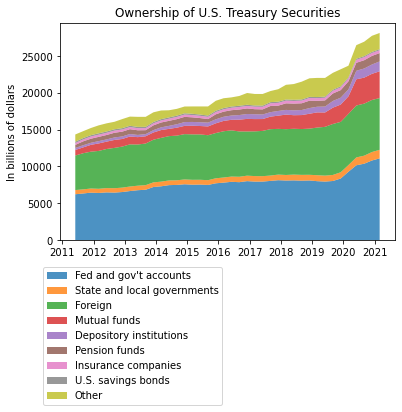

In [8]:
fig, ax = plt.subplots()
ax.stackplot(
    df1["DATE"].values,
    df1.drop("DATE", axis=1).T,
    labels=df1.drop("DATE", axis=1).keys(),
    alpha=0.8,
)
ax.legend(bbox_to_anchor=(0.5, -0.1))
ax.set_title("Ownership of U.S. Treasury Securities")
ax.set_ylabel("In billions of dollars")

plt.show()


In [9]:
df2 = df1
df2["Total"] = df2.drop("DATE", axis=1).sum(axis=1)

for i in df2.columns:
    if i != "DATE":
        df2[i] = df2[i] / df2["Total"]


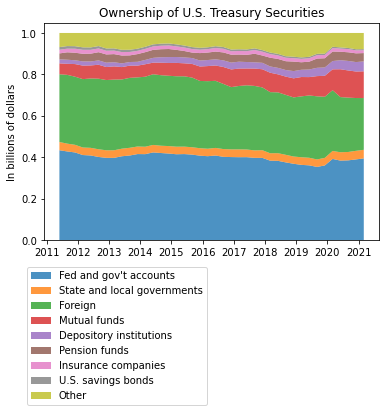

In [10]:
fig, ax = plt.subplots()
ax.stackplot(
    df2["DATE"].values,
    df2.drop(["DATE", "Total"], axis=1).T,
    labels=df1.drop(["DATE", "Total"], axis=1).keys(),
    alpha=0.8,
)
ax.legend(bbox_to_anchor=(0.5, -0.1))
ax.set_title("Ownership of U.S. Treasury Securities")
ax.set_ylabel("In billions of dollars")

plt.show()


- Depository institution
  - Includes U.S. chartered depository institutions, foreign banking offices in U.S., banks in U.S. affiliated areas, credit unions and bank holding companies.
- Mutual fund
  - a company that pools money from many investors and invests the money in securities such as stocks, bonds, and short-term debt.
- US Savings Bonds
  - a government bond offered to its citizens to help fund federal spending, and which provides savers with a guaranteed, although modest, return.
- Other
  - Includes individuals, Government-sponsored enterprises, brokers and dealers, bank personal trusts and estates, corporate and non-corporate businesses, and other investors.


## US Financial Accounts

- Financial Accounts of the United States - Z.1
  - https://www.federalreserve.gov/releases/z1/dataviz/z1/balance_sheet/chart/


## Financial Regulation in Japan

### Two types of banks

1. International Standard Bank
   - Banks that operate globally
     - 4 major banks + 11 regional banks
   - under Basel III


2. Domestic Standard Bank
   - other banks
   - the regulation is similar to, but weaker than Basel III


### Two regulations related to government bond holdings

1. Minimum Capital Requirements
   - Each government can set the risk weigh of their own government bond regardless of its rating
   - The risk weight of Japanese government bond is zero in Japan


2. Interest rate risk in the banking book (IRRBB)
   - the risk posed by movements in interest rates that cause a mismatch between the rates banks set on customer loans and on deposits.
   - $\frac{Interest \ rate \ risk}{Capital} \leq X$
     - Interest rate risk is calculated by simulating several scenarios of interest rate change
       - e.g. 50bps increase in short term interest rate & 50bps decreases in long term interest rate
     - For 1. international standard bank, the inequality should be satisfied for 6 scenarios with $X = 20\%$
     - For 2. domestic standard bank, the inequality should be satisfied for 3 scenarios with $X = 15\%$.
